<a href="https://colab.research.google.com/github/madhavavvs/Replication-of-McDonalds-Case-Study-in-Python/blob/main/FeynnLabs_Practice_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## STEP 1: Deciding to segment  &
## STEP 2: Specifying the Ideal Target Segment
After deciding to segment, McDonald’s management needs to decide which key features make a market segment attractive to them.In terms of segment attractiveness criteria, the obvious choice would be a
segment that has a positive perception of McDonald’s, frequently eats out and likes
fast food.

Given that the fast food data set in this case study contains very little information
beyond people’s brand image of McDonald’s, the following attractiveness criteria
will be used: liking McDonald’s and frequently eating at McDonald’s.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## STEP 3: Collecting Data

In [3]:
data = pd.read_csv('mcdonalds.csv')

## STEP 4: Explroing Data

In [4]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [6]:
data.isna().sum()
data.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [7]:
data['yummy'].value_counts()
data['convenient'].value_counts()
data['fattening'].value_counts()
data['greasy'].value_counts()
data['fast'].value_counts()
data['cheap'].value_counts()
data['tasty'].value_counts()
data['expensive'].value_counts()
data['healthy'].value_counts()
data['disgusting'].value_counts()

No     1100
Yes     353
Name: disgusting, dtype: int64

In [8]:
data["yummy"] = data["yummy"].replace({'Yes':1, 'No':0})
data["convenient"] = data["convenient"].replace({'Yes':1, 'No':0})
data["spicy"] = data["spicy"].replace({'Yes':1, 'No':0})
data["fattening"] = data["fattening"].replace({'Yes':1, 'No':0})
data["greasy"] = data["greasy"].replace({'Yes':1, 'No':0})
data["fast"] = data["fast"].replace({'Yes':1, 'No':0})
data["cheap"] = data["cheap"].replace({'Yes':1, 'No':0})
data["tasty"] = data["tasty"].replace({'Yes':1, 'No':0})
data["expensive"] = data["expensive"].replace({'Yes':1, 'No':0})
data["healthy"] = data["healthy"].replace({'Yes':1, 'No':0})
data["disgusting"] = data["disgusting"].replace({'Yes':1, 'No':0})

In [9]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male


In [10]:
data1 = data.iloc[:,0:11]
data1.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_df = sc.fit_transform(data1)

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=11)
princ_compo = pca.fit_transform(sc_df)
pca_df = pd.DataFrame(data=princ_compo, columns=["PCA1", "PCA2", "PCA3", "PCA4", "PCA5", "PCA6", "PCA7", "PCA8", "PCA9", "PCA10", "PCA11",])
pca_df.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11
0,0.704334,-0.437016,0.268698,-0.872074,-1.521184,0.470160,-0.030969,-0.687116,0.367598,0.321161,1.701170
1,-0.467820,0.364277,-1.596835,-0.004835,0.462385,-0.449321,0.087351,0.446003,0.221855,0.191268,1.467681
2,0.191986,1.712949,-0.339413,3.368168,-1.266802,0.148058,-0.606634,-0.668576,1.377226,-1.259300,-0.128530
3,-0.116991,-1.155122,-1.003913,0.469589,1.141750,-0.857182,0.015843,0.390275,-1.578539,0.092189,-0.233201
4,-0.034724,-1.390267,0.792275,0.473031,-0.270488,-0.847963,-1.804085,-0.700019,1.630339,0.092449,-0.033144


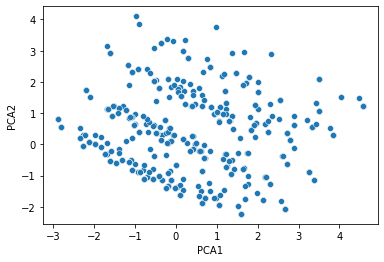

In [13]:
sns.scatterplot(data=pca_df, x="PCA1", y="PCA2")

## STEP 5: Extracting Segments

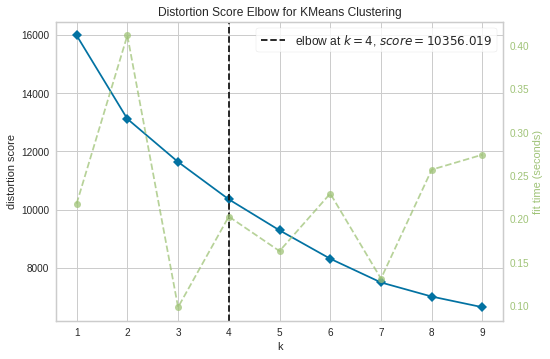

In [15]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans_model = KMeans()
visualizer = KElbowVisualizer(kmeans_model, k=(1,10))
visualizer.fit(sc_df)        
visualizer.show()     

In [16]:
kmeans = KMeans(4)
kmeans.fit_predict(sc_df)
pca_df_kmeans = pd.concat([pca_df, pd.DataFrame({'cluster':kmeans.labels_})], axis=1)

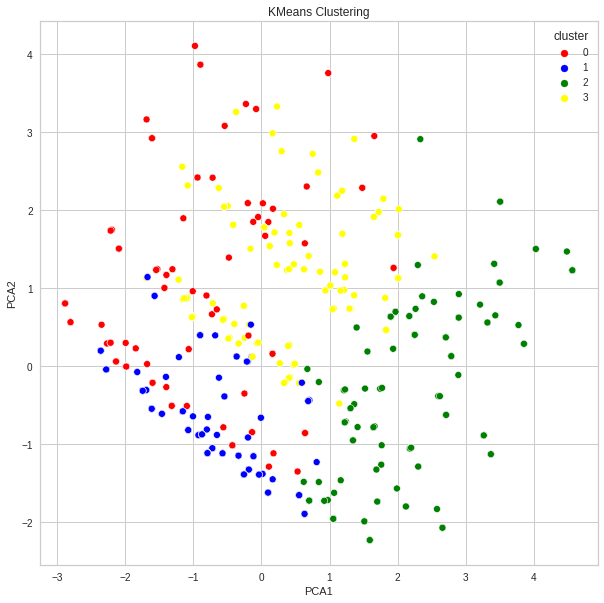

In [17]:
plt.figure(figsize=(10,10))
dia = sns.scatterplot(x="PCA1", y="PCA2", hue="cluster", data=pca_df_kmeans, palette=['red', 'blue', 'green', 'yellow'])
plt.title("KMeans Clustering")
plt.show()

In [18]:
kmeans = KMeans(4)
kmeans.fit_predict(sc_df)
pca_df_kmeans1 = pd.concat([data1,pd.DataFrame({'cluster':kmeans.labels_})], axis=1)

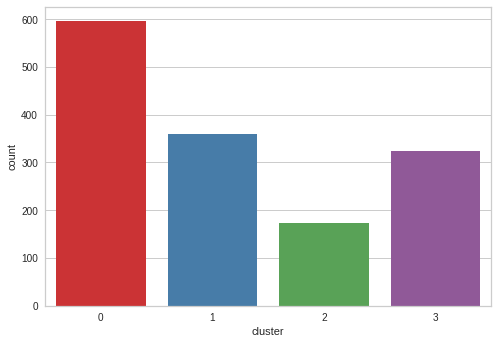

In [19]:
sns.countplot(x ='cluster', data = pca_df_kmeans1, palette = "Set1")

## STEP 6: Profiling Segments

In [20]:
cluster1 = pca_df_kmeans1[pca_df_kmeans1["cluster"]==0]
cluster2 = pca_df_kmeans1[pca_df_kmeans1["cluster"]==1]
cluster3 = pca_df_kmeans1[pca_df_kmeans1["cluster"]==2]
cluster4 = pca_df_kmeans1[pca_df_kmeans1["cluster"]==3]

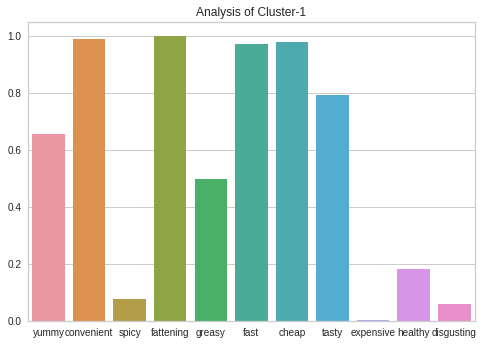

In [21]:
cluster1.head()
dia = sns.barplot(data=cluster1[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']], ci=None)
plt.title('Analysis of Cluster-1')
plt.show()

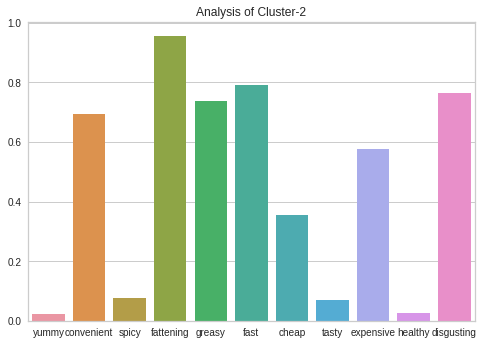

In [22]:
cluster2.head()
dia = sns.barplot(data=cluster2[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']], ci=None)
plt.title('Analysis of Cluster-2')
plt.show()

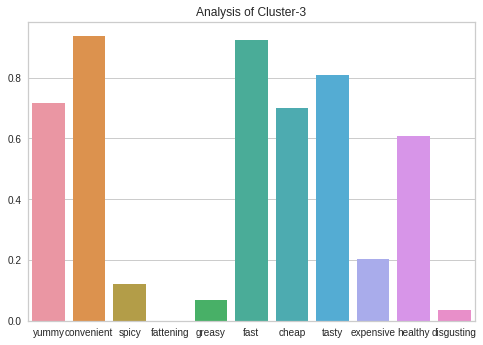

In [23]:
cluster3.head()
dia = sns.barplot(data=cluster3[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']], ci=None)
plt.title('Analysis of Cluster-3')
plt.show()

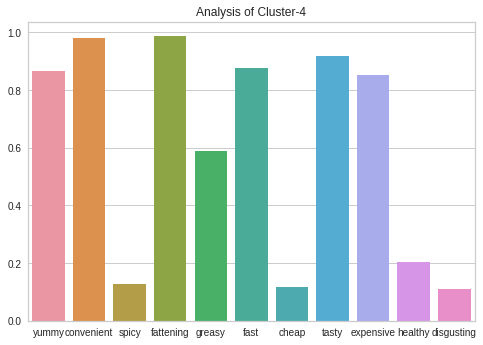

In [24]:
cluster4.head()
dia = sns.barplot(data=cluster4[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']], ci=None)
plt.title('Analysis of Cluster-4')
plt.show()

## STEP 7: Describing Segments

In [25]:
data_new= pd.concat([data,pd.DataFrame({'cluster':kmeans.labels_})],axis=1)
data_new.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female,1
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female,3
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female,3
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female,0
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male,0


In [26]:
data_new['VisitFrequency'].value_counts()

Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: VisitFrequency, dtype: int64

In [27]:
data_new["VisitFrequency"]= data_new["VisitFrequency"].replace({'Never':0, 'Once a year':1, 'Every three months':2, 'Once a month':3, 'Once a week':4, 'Never':5, 'More than once a week':6})

In [28]:
data_new['Like'].value_counts()

+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: Like, dtype: int64

In [29]:
data_new["Like"]= data_new["Like"].replace({'I hate it!-5':0, '-4':1, '-3':2, '-2':3, '-1':4, '0':5, '+1':6, '+2':7, '+3':8, '+4':9, 'I love it!+5':10})

In [30]:
data_new['Gender'].value_counts()

Female    788
Male      665
Name: Gender, dtype: int64

In [31]:
data_new["Gender"]= data_new["Gender"].replace({'Female':0, 'Male':1})

In [32]:
data_new.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster
0,0,1,0,1,0,1,1,0,1,0,0,2,61,2,0,1
1,1,1,0,1,1,1,1,1,1,0,0,7,51,2,0,3
2,0,1,1,1,1,1,0,1,1,1,0,6,62,2,0,3
3,1,1,0,1,1,1,1,1,0,0,1,9,69,4,0,0
4,0,1,0,1,1,1,1,0,0,1,0,7,49,3,1,0


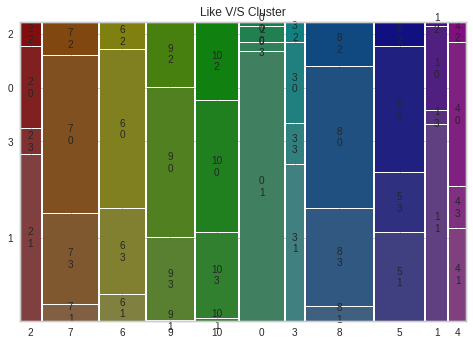

In [33]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic(data_new, ['Like','cluster'],title='Like V/S Cluster')
plt.show()

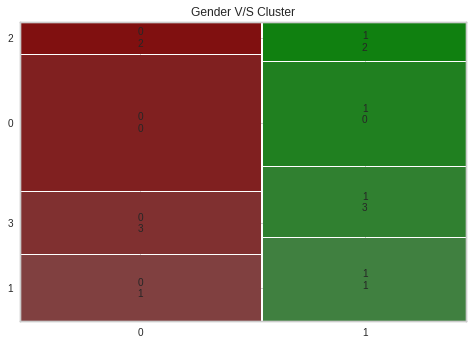

In [34]:
mosaic(data_new, ['Gender','cluster'],title='Gender V/S Cluster')
plt.show()

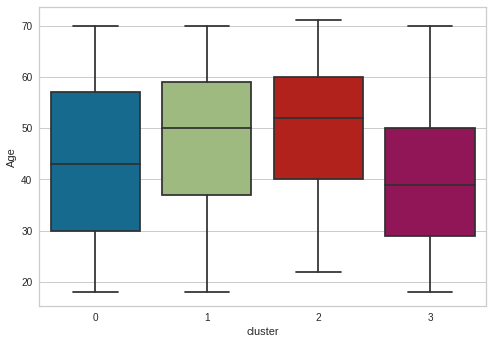

In [35]:
sns.boxplot(x=data_new['cluster'], y=data_new['Age'])
plt.show()

## STEP 8: Selecting the Target Segments

In [36]:
from sklearn.model_selection import train_test_split
X = data_new.drop(['cluster'],axis=1)
Y = data_new[['cluster']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [37]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state = 0)
model = classifier.fit(X, Y)

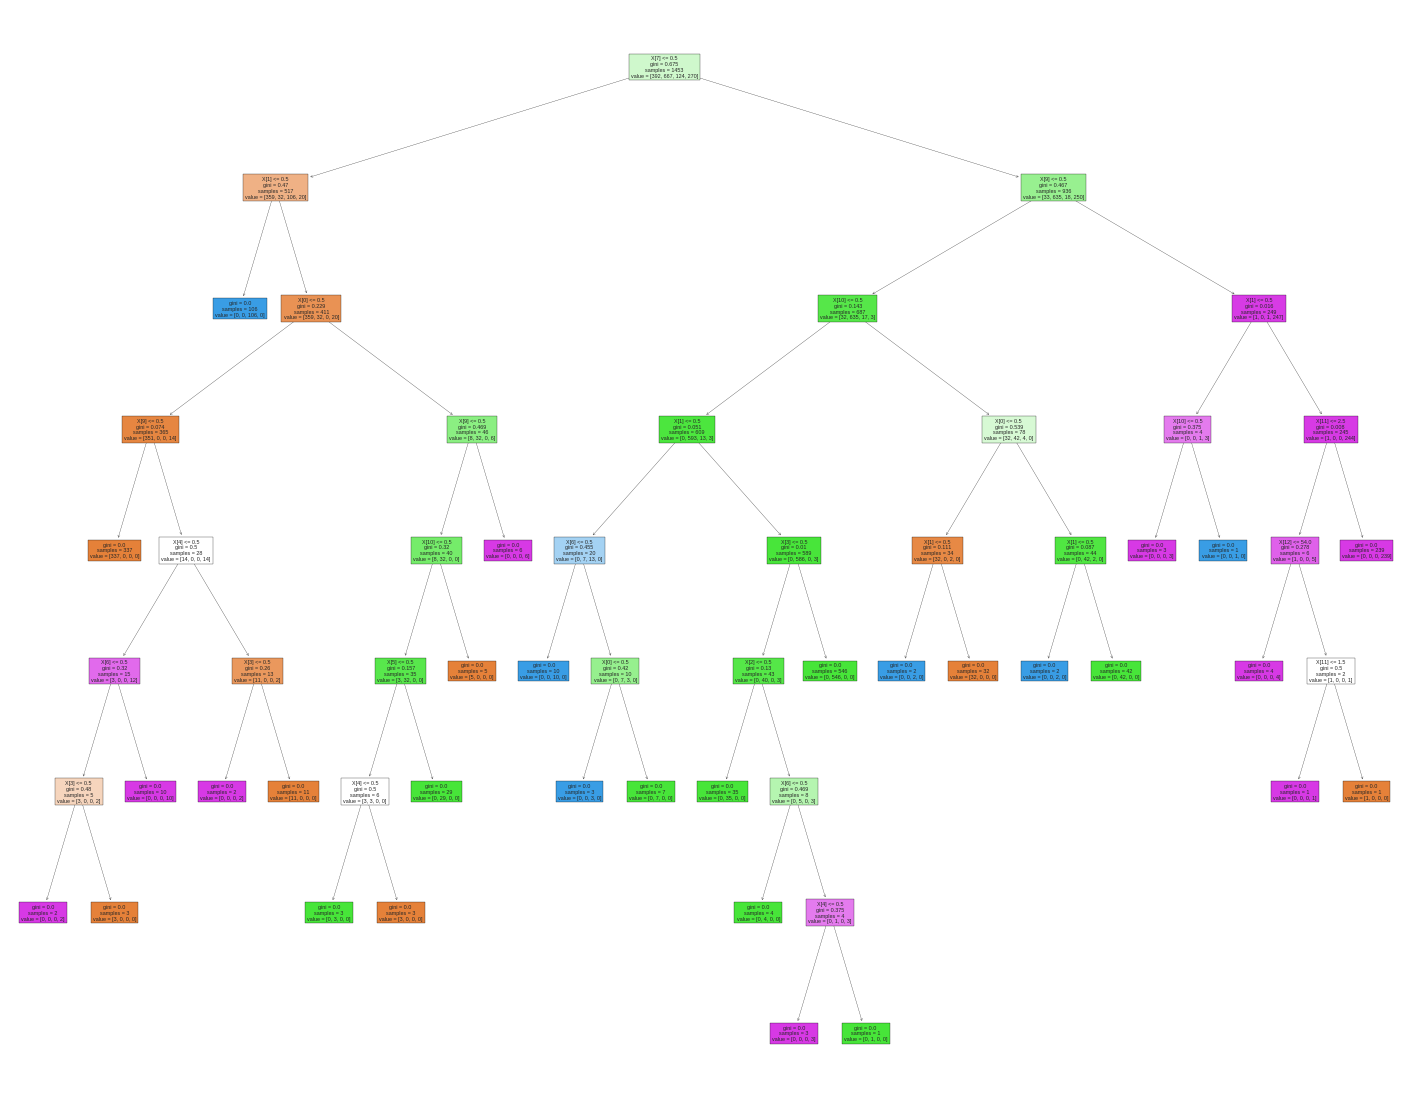

In [ ]:
from sklearn import tree
dia = plt.figure(figsize=(25,20))
_ = tree.plot_tree(classifier, filled=True)

## STEP 9: Customising the Marketing Mix

## STEP 10: Evaluation and Monitoring

In [38]:
classifier = DecisionTreeClassifier(criterion="entropy")
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

In [39]:
import pickle
filename = 'classifier.pkl'
pickle.dump(classifier, open(filename, 'wb'))

#again loading the stored model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result*100,'% Accuracy')

96.21993127147766 % Accuracy
